<a href="https://colab.research.google.com/github/todebode/Food-sales-predictions/blob/main/Food_sales_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Project 1 - Part 4 (Core)

Tijesunimi Odebode

02/17/2022

In [147]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [148]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


In [149]:
import pandas as pd
filename = "/content/drive/MyDrive/Coding Dojo Bootcamp/Data/sales_predictions.csv"

In [150]:
sales_predictions = pd.read_csv(filename)
sales_predictions.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [151]:
#1 How many rows and columns?
sales_predictions.shape

(8523, 12)

In [152]:
#2 What are the datatypes of each variable?
sales_predictions.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [153]:
#3 Are there duplicates? If so, drop any duplicates.
sales_predictions.duplicated().sum()


0

- There are no duplicates.

In [154]:
#4 Identify missing values.
sales_predictions.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

- There are 1463 missing values in the 'Item_Weight' column.

- There are 2410 missing values in the 'Outlet_Size' column.

In [155]:
#4 This shows the missing values as 'True' in the dataframe
sales_predictions_missing = sales_predictions.isna()
sales_predictions_missing

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,False,False,False,False,False,False,False,False,False,False,False,False
8519,False,False,False,False,False,False,False,False,True,False,False,False
8520,False,False,False,False,False,False,False,False,False,False,False,False
8521,False,False,False,False,False,False,False,False,False,False,False,False


### #5 Decide on how to address the missing values and do it! (This requires your judgement, so explain your choice)

The following is how I will address the problem:

a) For **"Item_Weight"** column, I will determine the median weight and then insert the median in the cells that have a missing value.

b) For the **"Outlet_Size"** column, 

i) I will count the number of each size (small, medium, High) that I have in the column. 

ii) I will then calculate the average count of all sizes. 

iii) I will fill the cells with missing values with the size whose count is closest to the average.


In [156]:
#5a For "Item_Weight" column, I will determine the median weight and then insert the median in the cells that have a missing value.
sales_item_weight_f = sales_predictions['Item_Weight'].median()
sales_item_weight_d = sales_predictions.loc[:, "Item_Weight"].fillna(sales_item_weight_f, inplace=True)

In [157]:
#5b  For the "Outlet_Size" column,
# i) I will count the number of each size (small, medium, High) that I have in the column.
sales_predictions.Outlet_Size.value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [158]:
# 5b  For the "Outlet_Size" column,
# ii)  I will then calculate the average count of all sizes
Small_size = sales_predictions.Outlet_Size.value_counts().Small 
Medium_size = sales_predictions.Outlet_Size.value_counts().Medium
High_size = sales_predictions.Outlet_Size.value_counts().High 
avg = (Small_size + Medium_size + High_size)/3
avg



2037.6666666666667

In [159]:
# 5b  For the "Outlet_Size" column,
# iii) I will fill the cells with missing values with the size whose count is closest to the average.
sales_predictions.loc[:, "Outlet_Size"].fillna('Small', inplace=True) 
# Since the average value (2037.67) is closest to the number of small sizes in the "Outlet_Size" column, 
# I have filled in 'Small' in the cells with missing values


- For the two columns with missing values in question 5, I used the **"single value imputation"** method to deal with the missing values.I decided not to use the **'deletion'** method because the number of missing values for each column that had a missing value was too many.

In [160]:
#6 Confirm that there are no missing values after addressing them.
sales_predictions.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

- Since all the columns have '0', this confirms that there are no missing values in the dataframe.

In [161]:
#7  Find and fix any inconsistent categories of data (example: fix cat, Cat, and cats so that they are consistent) 
#Let's see the unique values in the 'Item_Fat_Content' column and sort them alphabetically
Item_Fat_Cont = sales_predictions['Item_Fat_Content'].unique()
Item_Fat_Cont.sort()
Item_Fat_Cont

array(['LF', 'Low Fat', 'Regular', 'low fat', 'reg'], dtype=object)

- It is obvious from the unique values that "Low Fat" is written in different ways - capitalized, lower case and even abbreviated. It is also obvious that 'Regular' is written in two ways: 'Regular' and 'reg.'

In [162]:
# We can make all "low fat" uppercase and also have a space between 'Low' and 'Fat'
sales_predictions['Item_Fat_Content'] = sales_predictions['Item_Fat_Content'].replace(['LF','low fat'],'Low Fat')
Item_Fat_Cont = sales_predictions['Item_Fat_Content'].unique()
Item_Fat_Cont.sort()
Item_Fat_Cont

array(['Low Fat', 'Regular', 'reg'], dtype=object)

In [163]:
# We can make all 'Regular' lowercase as thus: 'regular'
sales_predictions['Item_Fat_Content'] = sales_predictions['Item_Fat_Content'].replace(['Regular','reg'],'Regular')
Item_Fat_Cont = sales_predictions['Item_Fat_Content'].unique()
Item_Fat_Cont.sort()
Item_Fat_Cont

array(['Low Fat', 'Regular'], dtype=object)

In [164]:
#7 Let's see the unique values in the 'Item_Type' column and sort them alphabetically
Item_Ty = sales_predictions['Item_Type'].unique()
Item_Ty.sort()
Item_Ty

array(['Baking Goods', 'Breads', 'Breakfast', 'Canned', 'Dairy',
       'Frozen Foods', 'Fruits and Vegetables', 'Hard Drinks',
       'Health and Hygiene', 'Household', 'Meat', 'Others', 'Seafood',
       'Snack Foods', 'Soft Drinks', 'Starchy Foods'], dtype=object)

- It looks like there are no inconsistent categories of data in the 'Item_Type' column.

In [165]:
#7 Let's see the unique values in the 'Outlet_Size' column and sort them alphabetically
Outlet_Si = sales_predictions['Outlet_Size'].unique()
Outlet_Si.sort()
Outlet_Si

array(['High', 'Medium', 'Small'], dtype=object)

- It looks like there are no inconsistent categories of data in the 'Outlet_Size' column.

In [166]:
#7 Let's see the unique values in the 'Outlet_Location_Type' column and sort them alphabetically
Outlet_Loc = sales_predictions['Outlet_Location_Type'].unique()
Outlet_Loc.sort()
Outlet_Loc

array(['Tier 1', 'Tier 2', 'Tier 3'], dtype=object)

- It looks like there are no inconsistent categories of data in the 'Outlet_Location_Type' column.

In [167]:
#7 Let's see the unique values in the 'Outlet_Type' column and sort them alphabetically
Outlet_Ty = sales_predictions['Outlet_Type'].unique()
Outlet_Ty.sort()
Outlet_Ty

array(['Grocery Store', 'Supermarket Type1', 'Supermarket Type2',
       'Supermarket Type3'], dtype=object)

- It looks like there are no inconsistent categories of data in the 'Outlet_Type' column.

In [168]:
#8 For any numerical columns, obtain the summary statistics of each (min, max, mean)
sales_predictions.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.00000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.81342,0.066132,140.992782,1997.831867,2181.288914
std,4.22724,0.051598,62.275067,8.371760,1706.499616
min,4.55500,0.000000,31.290000,1985.000000,33.290000
25%,9.31000,0.026989,93.826500,1987.000000,834.247400
50%,12.60000,0.053931,143.012800,1999.000000,1794.331000
75%,16.00000,0.094585,185.643700,2004.000000,3101.296400
max,21.35000,0.328391,266.888400,2009.000000,13086.964800


## Statistical Analyses

- Histogram to view the distributions of various features in the dataset.
- Boxplot to view statistical summaries of various features in the dataset.
- Heatmap of the correlation between features.

In [169]:
# Let's see the data again
sales_predictions.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


**Plot 1:** Histogram of the Maximum Retail Price (list price) of products.

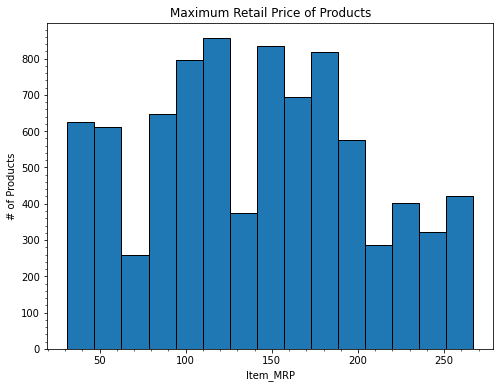

In [170]:
#Plot 1: Histogram of the Maximum Retail Price (list price) of products.
plt.figure(figsize=(8,6))
# Parameter "edgecolor='black'" was adapted from: https://www.youtube.com/watch?v=XDv6T4a0RNc&list=PL-osiE80TeTvipOqomVEeZ1HRrcEvtZB_&index=6
plt.hist(sales_predictions['Item_MRP'], bins = 15, edgecolor='black')
plt.xlabel("Item_MRP")
plt.ylabel("# of Products")
plt.title('Maximum Retail Price of Products')
# "The following Code adapted from: https://stackoverflow.com/questions/9127434/how-to-create-major-and-minor-gridlines-with-different-linestyles-in-python”
plt.minorticks_on();

- Item_MRP stands for "Maximum Retail Price (list price) of the product."

- The above histogram shows the maximum retail price ranges (represented by blue-colored bins) of multiple food products and the number of products that fall in that price range. 

- It is apparent from the above histogram that the highest number of products fall in the maximum retail price range of roughly 110-125.

- It is also obvious from the above histogram that no product has a maximum retail price less than approximately 30. Also, no product has a maximum retail price greater than about 268. 

**Plot 2:** Boxplot of the 'Item_Weight' column.

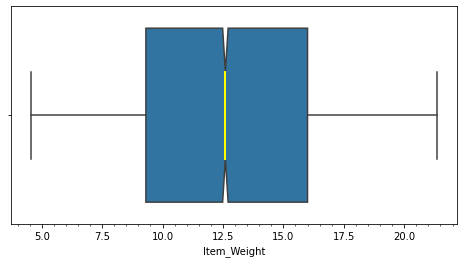

In [171]:
#Plot 2: Boxplot of the 'Item_Weight' column.
plt.figure(figsize=(8,4))
sns.boxplot(data=sales_predictions, x='Item_Weight', medianprops = dict(linestyle='-', linewidth=2, color='yellow'), notch = True)
plt.minorticks_on();

- In the above boxplot, it is apparent that there are no outliers for  the 'Item_Weight' column.

- Also, the yellow-colored line in middle of the box represents the **median** for the "Item_Weight" column.This value is approximately around 12.5. We can also see that the **25th percentile** is approximately around 9.3, the **75th percentile** is approximately around 16, the **minimum** is approximately around 4.5 and the **maximum** is approximately around 21.4. These numbers match up closely with what we see in the summary of statistics table below.  

- In the table below, 25th percentile is represented by 25%, median is represented by 50%, 75th percentile is 75%, and the minimum and maximum are 'min' and 'max.'

In [172]:
# The row with title '50%' in the table below shows the median for each column
sales_predictions.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.00000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.81342,0.066132,140.992782,1997.831867,2181.288914
std,4.22724,0.051598,62.275067,8.371760,1706.499616
min,4.55500,0.000000,31.290000,1985.000000,33.290000
25%,9.31000,0.026989,93.826500,1987.000000,834.247400
50%,12.60000,0.053931,143.012800,1999.000000,1794.331000
75%,16.00000,0.094585,185.643700,2004.000000,3101.296400
max,21.35000,0.328391,266.888400,2009.000000,13086.964800


**Plot 3:** Heat map of the 'sales_predictions' dataframe

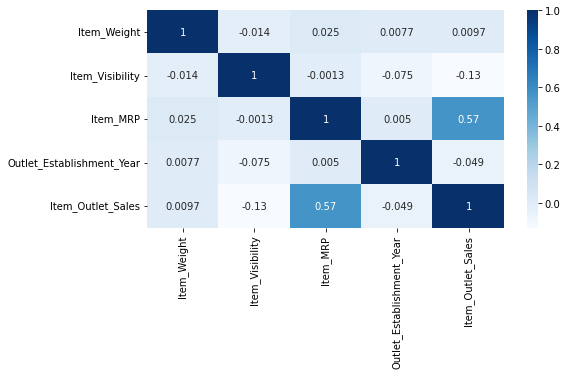

In [173]:
# Plot 3: Heat map of the 'sales_predictions' dataframe
corr_salespredict = sales_predictions.corr()
plt.figure(figsize=(8,4))
sns.heatmap(corr_salespredict, cmap='Blues', annot=True);

- The above heat map shows a comparision of every column in the 'sales_predictions' dataframe against every other column.The numbers on each box are the correlation values for each comparison. Low correlation values are roughly between 0.3 and 0.5. Moderate correlation values are between 0.5 and 0.7. Strong correlation values are greater than 0.7. 

- It is obvious from the above heat map that when you compare each column against itself, you get a correlation value of 1. This is expected. Also, when 'Item_Outlet_Sales' is compared against 'Item_MRP', there is moderate positive correlation with a correlation value of 0.57. This means that the higher the maximum retail price (list price) of the product, the higher the sales of the product in the paricular store, and the lower the maximum retail price (list price) of the product, the lower the sales of the product in the paricular store.

- The correlation values in the other boxes in the above heat map are either less than +0.1(indicating almost no correlation or very weak positive correlation) or they are very weak negative correlation values. Negative correlation indicates that when one column feature goes up, the other column feature being compared with it goes down and vice versa.

## Project 1 - Part 4 (Core) starts here

### 1. Most of the cleaning has been done in previous exercises. However, I would love to address any outliers in our data set.

In [174]:
# 1) Let's address any outliers in our data set
# Let's first use the .describe() function
sales_predictions.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.00000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.81342,0.066132,140.992782,1997.831867,2181.288914
std,4.22724,0.051598,62.275067,8.371760,1706.499616
min,4.55500,0.000000,31.290000,1985.000000,33.290000
25%,9.31000,0.026989,93.826500,1987.000000,834.247400
50%,12.60000,0.053931,143.012800,1999.000000,1794.331000
75%,16.00000,0.094585,185.643700,2004.000000,3101.296400
max,21.35000,0.328391,266.888400,2009.000000,13086.964800


- To determine the outliers in our data, I would have to use a data visualization technique. I have used boxplots. First, I will look at the above summary statistics (found using the function '.describe'), and then look at the median of each column to see if it is around halfway through all the values. If the median is around halfway all the values, then there is a chance that column does not have an outlier. Secondly, if the maximum is far away from the 75% percentile value, there is a chance that column has an outlier. I have selected columns based on the above 2 criteria stated and decided to create boxplots for each of those columns below.

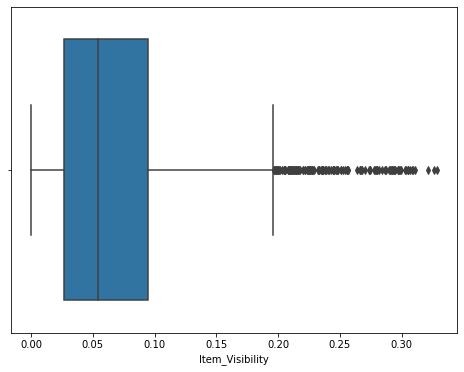

In [175]:
# Boxplot for 'Item_Visibility' column
plt.figure(figsize=(8,6))
sns.boxplot(data=sales_predictions, x='Item_Visibility');

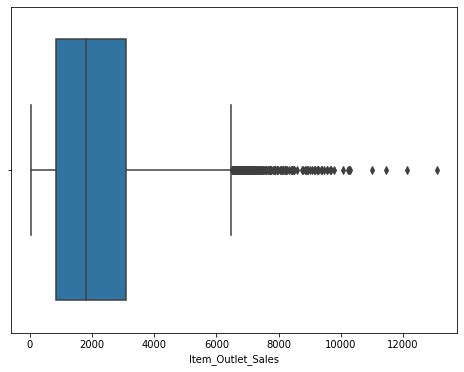

In [176]:
# Boxplot for 'Item_Outlet_Sales' column
plt.figure(figsize=(8,6))
sns.boxplot(data=sales_predictions, x='Item_Outlet_Sales');


- It is obvious from the above boxplots that the following columns have outliers in them: 'Item_Visibility' and 'Item_Outlet_Sales.'
- I have decided to keep the outliers in the 'sales_predictions' data.I don't see a reason to believe the outliers are an error in the dataset. 

### 2. I would love to create a minimum of two data visualizations that help others understand trends in the sales_predictions data set (explanatory data analysis).

a) I will compare the 'Item_Visibility' and 'Item_Outlet_Sales' columns to see if there is any correlation between product visibility (the percentage of total display area of all products in a store allocated to the particular product) and sales of the product in the particular store.

b) I will compare the mean of 'Item_Outlet_Sales' column with the Fat Content (column "Item_Fat_Content) to see if there is any correlation between the fat content of food products and the average sales of products in various stores.

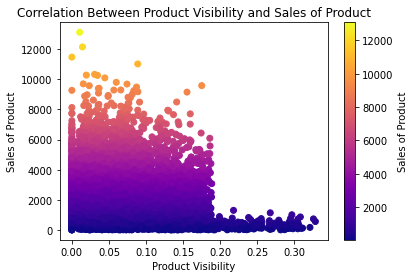

In [184]:
# a) Compare the 'Item_Visibility' and 'Item_Outlet_Sales' columns
plt.scatter(sales_predictions['Item_Visibility'], 
sales_predictions['Item_Outlet_Sales'], 
c=sales_predictions['Item_Outlet_Sales'], cmap='plasma')
plt.colorbar(label='Sales of Product')
plt.title('Correlation Between Product Visibility and Sales of Product')
plt.xlabel('Product Visibility')
plt.ylabel('Sales of Product')
plt.show();

- From the above scatter plot, I don't see any correlation between product visibility (the percentage of total display area of all products in a store allocated to the particular product) and sales of product.

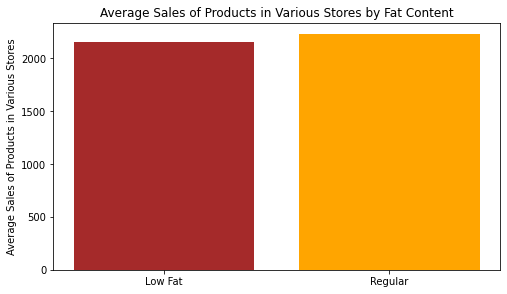

In [185]:
# b) Compare the mean of 'Item_Outlet_Sales' column with the Fat Content (column "Item_Fat_Content') 
fig = plt.figure(figsize=(8,10))
ax1 = fig.add_subplot(211)
fat_content = sales_predictions.groupby('Item_Fat_Content')['Item_Outlet_Sales'].mean()
ax1.bar(fat_content.index, fat_content, color=['brown','orange'])
ax1.set_ylabel('Average Sales of Products in Various Stores')
ax1.set_title('Average Sales of Products in Various Stores by Fat Content');


- From the above bar chart, it looks like the average sales of products in various stores is higher for food products with regular fat content than food products with low fat content.